# Gibbs Sampling for Bivariate Normal Distribution

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Retina display
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

In [2]:
from tueplots import bundles
plt.rcParams.update(bundles.beamer_moml())


# Also add despine to the bundle using rcParams
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

# Increase font size to match Beamer template
plt.rcParams['font.size'] = 16
# Make background transparent
plt.rcParams['figure.facecolor'] = 'none'

In [3]:
torch.manual_seed(42)
mean = torch.tensor([0.0, 0.0], dtype=torch.float64)
covariance = torch.tensor([[2.0, 1.0], [1.0, 2.0]], dtype=torch.float64)

theta0_range = np.linspace(-5, 5, 100)
theta1_range = np.linspace(-5, 5, 100)
Theta0, Theta1 = np.meshgrid(theta0_range, theta1_range)

In [4]:
rho = covariance[0, 1] / torch.sqrt(covariance[0, 0] * covariance[1, 1])

In [5]:
pdf_values = np.zeros_like(Theta0)
for i in range(pdf_values.shape[0]):
    for j in range(pdf_values.shape[1]):
        theta = torch.tensor([Theta0[i, j], Theta1[i, j]], dtype=torch.float64)
        diff = theta - mean
        inv_covariance = torch.linalg.inv(covariance)
        exponent = -0.5 * torch.dot(diff, torch.mv(inv_covariance, diff))
        pdf_values[i, j] = torch.exp(exponent).item()

In [12]:
initial_guess = torch.tensor([10.0, 10.0])
samples = []
samples.append(initial_guess.clone().detach())
current_estimate = initial_guess.clone()
for i in range(6):
    if (i % 2 == 0):
        conditional_mean_theta0 = current_estimate[1]*rho
        conditional_std_theta0 = (1-rho**2)**0.5
        theta0_sample = torch.normal(
            conditional_mean_theta0, conditional_std_theta0)
        old_theta1 = current_estimate[1]
        current_estimate = torch.tensor([theta0_sample, old_theta1])
    else:
        conditional_mean_theta1 = current_estimate[0]*rho
        conditional_std_theta1 = (1-rho**2)**0.5
        theta1_sample = torch.normal(
            conditional_mean_theta1, conditional_std_theta1)
        old_theta0 = current_estimate[0]
        current_estimate = torch.tensor([old_theta0, theta1_sample])

    samples.append(current_estimate.clone().detach())

samples_tensor = torch.stack(samples)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the foll

findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the foll

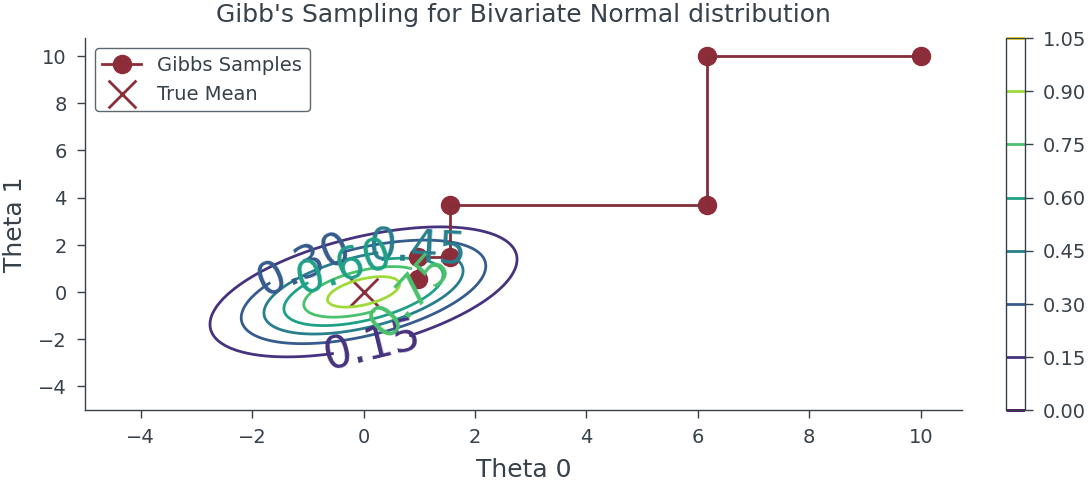

In [14]:
contour = plt.contour(Theta0, Theta1, pdf_values)
plt.clabel(contour, inline=1)
plt.plot(samples_tensor[:, 0], samples_tensor[:, 1],
         marker='o', label='Gibbs Samples')
plt.plot(samples_tensor[:, 0], samples_tensor[:, 1], linewidth=1, alpha=0.1)
plt.xlabel('Theta 0')
plt.ylabel('Theta 1')
plt.title('Gibb\'s Sampling for Bivariate Normal distribution')
plt.scatter(mean[0], mean[1], marker='x', s=100, label='True Mean')
plt.legend()
plt.colorbar(contour)
# plt.savefig('figures/sampling/gibbs_sampling_bivariate_normal.pdf', transparent=True, bbox_inches='tight', dpi=300)